In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def predict(x, w, b):
  return sigmoid(np.dot(w.T, x) + b)

def predict_bool(x, w, b):
  return predict(x, w, b) >= 0.5

def model(x, y, learning_rate, iter):
  n, m = x.shape

  w = np.zeros((n, 1))
  b = 0

  for _ in range(iter):
    a = predict(x, w, b)
    deriv_w = (1 / m) * np.matmul(a - y, x.T)
    deriv_b = (1 / m) * np.sum(a - y)
    w = w - learning_rate * deriv_w.T
    b = b - learning_rate * deriv_b

  return w, b

In [ ]:
x_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
y_data = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

x = np.array(x_data).reshape((1, len(x_data)))
y = np.array(y_data).reshape((1, len(y_data)))

In [ ]:
w, b = model(x, y, 0.001, 100000)
print(w.shape)
print(b)

(1, 1)
-5.906393101204658


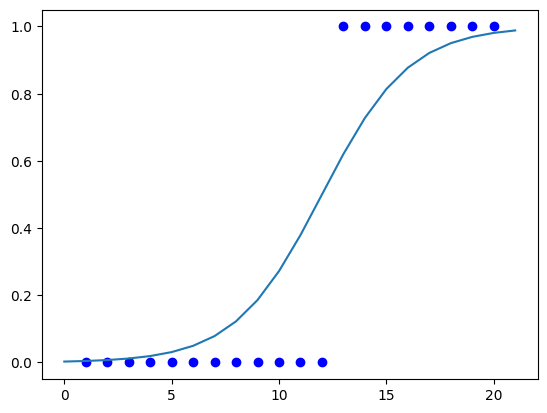

In [389]:
plt.scatter(x, y, color='blue')

x_val = np.arange(22)
fn = lambda x: predict(x, w, b)

plt.plot(x_val, np.vectorize(fn)(x_val))

In [ ]:
assert(predict_bool(20, w, b))
assert(predict_bool(25, w, b))
assert(predict_bool(100, w, b))
assert(predict_bool(70, w, b))
assert(not predict_bool(12, w, b))
assert(not predict_bool(6, w, b))
assert(not predict_bool(3, w, b))
assert(not predict_bool(1, w, b))
assert(not predict_bool(0, w, b))